# 1. Simple Linear Regression Modeling

## A tale of two variables


In [1]:
import pandas as pd
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [2]:
churn.mean()

has_churned                  0.500000
time_since_first_purchase   -0.034370
time_since_last_purchase     0.144549
dtype: float64

In [3]:
churn['time_since_first_purchase'].corr(churn['time_since_last_purchase'])

0.41249848686785473

#### What is regression?

> Statistical models to explore the relationship a response variable and some explanatory variables.

> Given values of explanatory variables, you can predict the values of the response variable.

#### Terms

> _Reponse variable._ (Dependent variable)

> _Explanatory variables._ (Independent variables)


##### Linear Regression 
> The response variable is numeric.

##### Logistic Regression 
> The response variable is logical.

##### Simple linear / logistic regression.
> There is only one explanatory variable.


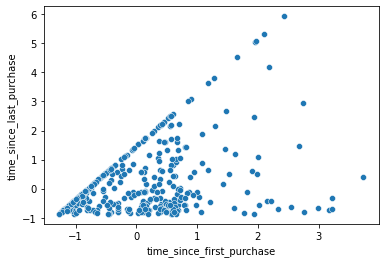

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='time_since_first_purchase', y='time_since_last_purchase', data=churn)
plt.show()

##### Adding a trend line

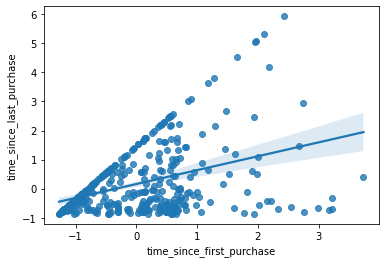

In [5]:
sns.regplot(x='time_since_first_purchase', y='time_since_last_purchase', data=churn)
plt.show()

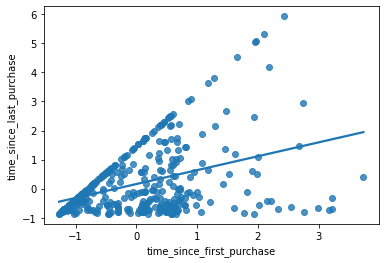

In [6]:
sns.regplot(x='time_since_first_purchase', y='time_since_last_purchase', data=churn, ci=None)
plt.show()

##### Python packages for regression

> statsmodels: Optimized for insight.

> scikit-learn: Optimized for prediction.

### Visualizing two numeric variables


In [7]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


<AxesSubplot:xlabel='n_convenience', ylabel='price_twd_msq'>

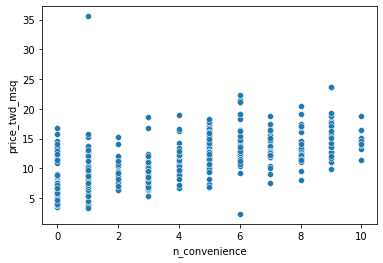

In [8]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

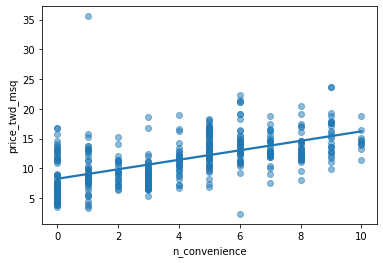

In [9]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Fitting a linear regression
#### The Definition of a Straight Line
##### Intercept: The _y_ value at the point when _x_ is zero.
##### Slope: The amount the _y_ value increases if you increase _x_ by one.
##### Equation: y = intercept  + slope * _x_

### Estimate the intercept


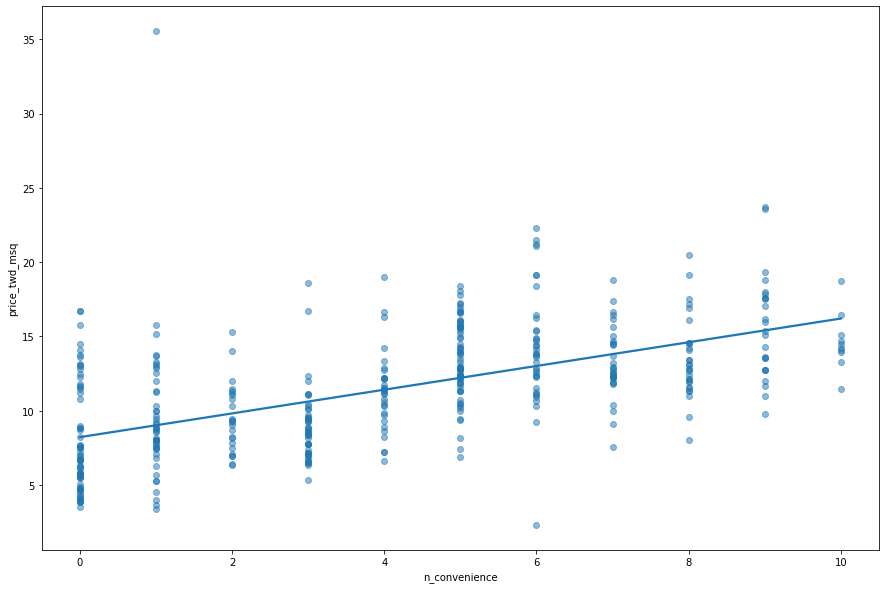

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

> At this point, the trend line crosses the y-axis or x = 0. With calculations I estimate it is about 7.9.

### Estimate the slope


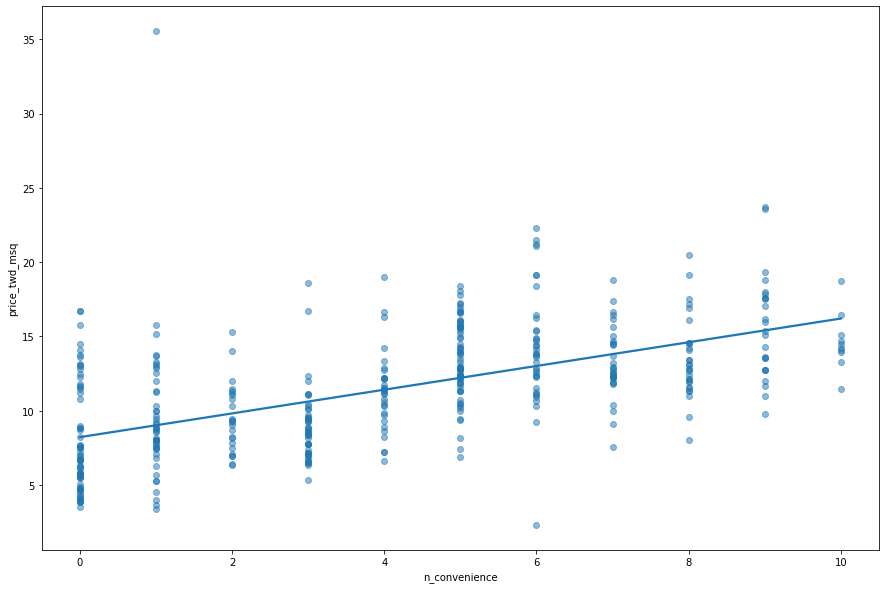

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

> The slope is the rate of change in the y direction divided by the rate of change in the x direction. I estimate it is about 0.7.

### Linear regression with ols()


In [12]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

> INTERCEPT: The model had an Intercept coefficient of 8.2242. This means, on average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

> SLOPE: The model had an n_convenience coefficient of 0.7981. If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

> In general, the intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

### Categorical explanatory variables




In [13]:
fish = pd.read_csv('fish.csv')
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


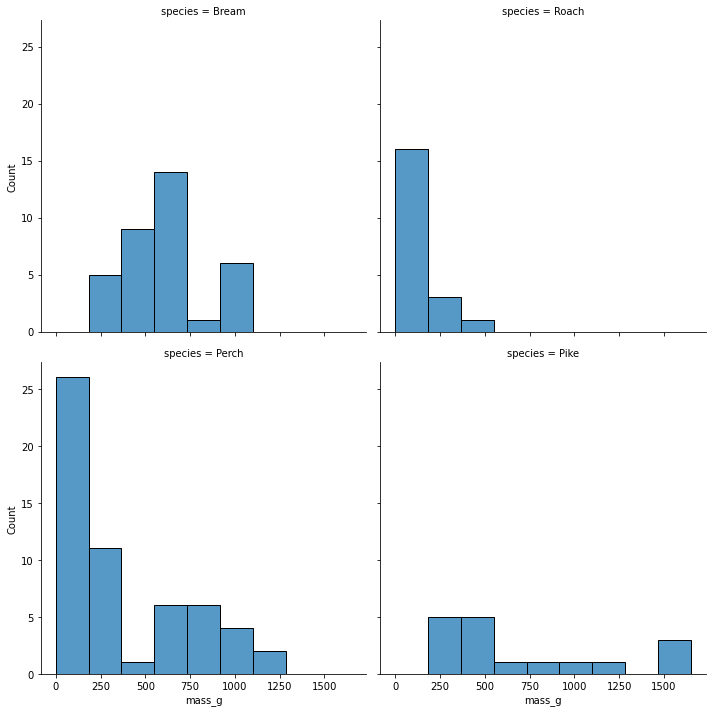

In [14]:
sns.displot(data=fish, x='mass_g', col='species', col_wrap=2, bins=9)
plt.show()

In [15]:
summary_stats = fish.groupby('species')['mass_g'].mean()
summary_stats

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

In [16]:
mdl_mass_vs_species = ols('mass_g ~ species', data=fish).fit()
mdl_mass_vs_species.params

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64

> The coeffitients cannot be negative!

> Note: For categorical variables add "+ 0" to the model.

In [17]:
mdl_mass_vs_species = ols('mass_g ~ species + 0', data=fish).fit()
mdl_mass_vs_species.params

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64

> When you only have a single categorical explanatory variable, the linear regression coefficients are simply the means of each category.

### Visualizing numeric vs. categorical


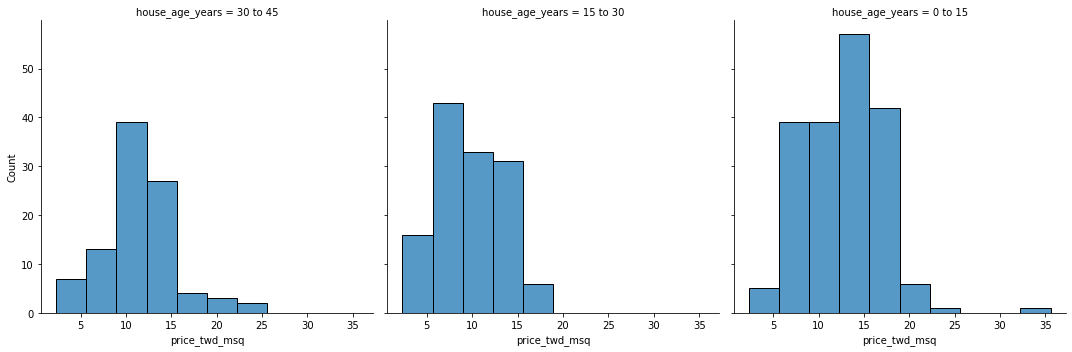

In [18]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

### Calculating means by category


In [19]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
mean_price_by_age

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

### Linear regression with a categorical explanatory variable


In [20]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
mdl_price_vs_age.params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

In [21]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
mdl_price_vs_age0.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

> The coefficients of the model are just the means of each category you calculated previously.

# 2. Predictions and model objects
## Making predictions


In [22]:
bream = fish[fish['species'] == 'Bream']
bream.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


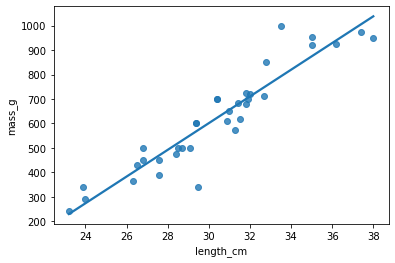

In [23]:
sns.regplot(x='length_cm', y='mass_g', data=bream, ci=None)
plt.show()

#### Running the model

In [24]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
mdl_mass_vs_length.params

Intercept   -1035.347565
length_cm      54.549981
dtype: float64

In [25]:
import numpy as np
explanatory_data = pd.DataFrame({"length_cm": np.arange(20,41)})
explanatory_data

,length_cm
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


#### Call .predict()

In [26]:
mdl_mass_vs_length.predict(explanatory_data)

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64

In [27]:
prediction_data = explanatory_data.assign(mass_g_predicted=mdl_mass_vs_length.predict(explanatory_data))
prediction_data

,length_cm,mass_g_predicted
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


### Showing predictions

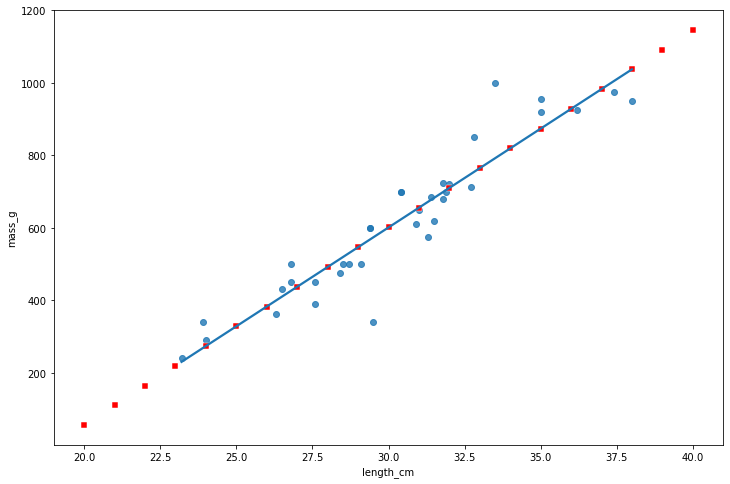

In [28]:
fig = plt.figure(figsize=(12, 8))
sns.regplot(x='length_cm', y='mass_g', data=bream, ci=None)

sns.scatterplot(x="length_cm", y='mass_g_predicted', data=prediction_data, color='red', marker='s')
plt.show()

### Extrapolating

> EXTRAPOLATING means making predictions outside the range of observed data.

In [29]:
little_bream = pd.DataFrame({"length_cm": [10]})
pred_little_bream = little_bream.assign(mass_g_pred=mdl_mass_vs_length.predict(little_bream))
pred_little_bream

,length_cm,mass_g_pred
0,10,-489.847756


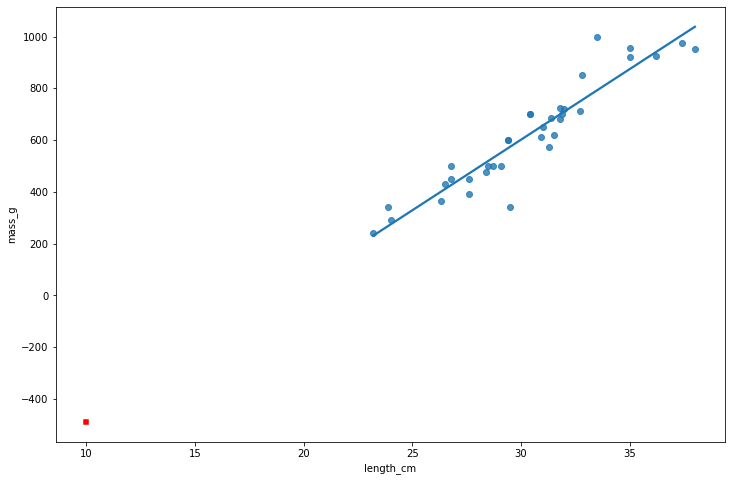

In [30]:
fig = plt.figure(figsize=(12, 8))
sns.regplot(x='length_cm', y='mass_g', data=bream, ci=None)

sns.scatterplot(x="length_cm", y='mass_g_pred', data=pred_little_bream, color='red', marker='s')
plt.show()

> The mass predicted it is not physically possible. The model perfoms poorly in this case.

> Note: Extrapolation is sometimes appropiate, but it can lead to misleading or ridiculous results.

### Predicting house prices


In [31]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(11)})
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [32]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
price_twd_msq

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64

In [33]:
# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
prediction_data

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing predictions


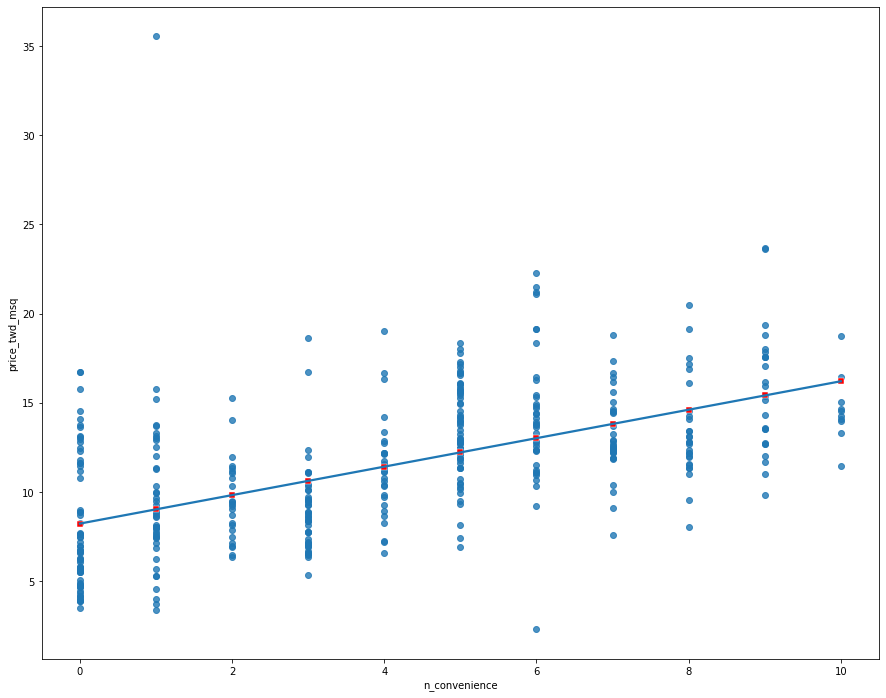

In [34]:
# Create a new figure, fig
fig = plt.figure(figsize=(15, 12))

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color = "red", marker='s')

# Show the layered plot
plt.show()

### The limits of prediction


In [35]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})
impossible

,n_convenience
0,-1.0
1,2.5


In [36]:
# Create prediction_data
impossible_pred = impossible.assign(price_twd_msq = mdl_price_vs_conv.predict(impossible))
impossible_pred

,n_convenience,price_twd_msq
0,-1.0,7.426158
1,2.5,10.219437


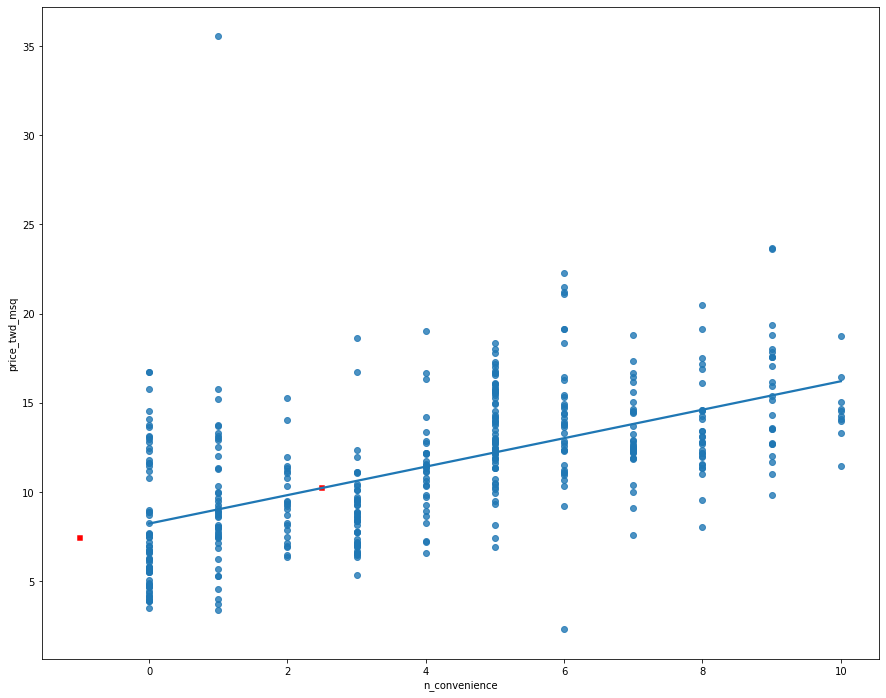

In [37]:
# Create a new figure, fig
fig = plt.figure(figsize=(15, 12))

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=impossible_pred,
                color = "red", marker='s')

# Show the layered plot
plt.show()

> The model successfully gives a prediction about cases that are impossible in real life.

> Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

## Working with model objects


#### Parameters

In [38]:
mdl_mass_vs_length.params

Intercept   -1035.347565
length_cm      54.549981
dtype: float64

#### Fitted Values: Prediction on the original dataset

In [39]:
mdl_mass_vs_length.fittedvalues

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64

#### Residuals: Actual response values minus predicted response values. Measure of inaccuracy in the model fit.

In [40]:
mdl_mass_vs_length.resid

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64

In [41]:
bream['mass_g'] - mdl_mass_vs_length.fittedvalues

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64

In [42]:
mdl_mass_vs_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.22e-16
Time:                        15:03:54   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extracting model elements


In [43]:
# Print the model parameters of mdl_price_vs_conv
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [44]:
# Print the fitted values of mdl_price_vs_conv
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [45]:
# Print the residuals of mdl_price_vs_conv
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [46]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.41e-37
Time:                        15:03:54   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### Manually predicting house prices


In [47]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + (slope * explanatory_data)
price_twd_msq

,n_convenience
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875
9,15.406955


In [48]:
# Compare to the results from .predict()
price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data))

,n_convenience,predictions_auto
0,8.224237,8.224237
1,9.022317,9.022317
2,9.820397,9.820397
3,10.618477,10.618477
4,11.416556,11.416556
5,12.214636,12.214636
6,13.012716,13.012716
7,13.810795,13.810795
8,14.608875,14.608875
9,15.406955,15.406955


### Regression to the mean

The concept = fitted value + residuals

The stuff explained + The stuff couldn't explained

> Residuals exist due to problems in the model and fundamental randomness.

> Extreme cases are often due to randomness.

> Regression to the mean: Means extreme cases don't persist over time.

### Plotting consecutive portfolio returns



In [49]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


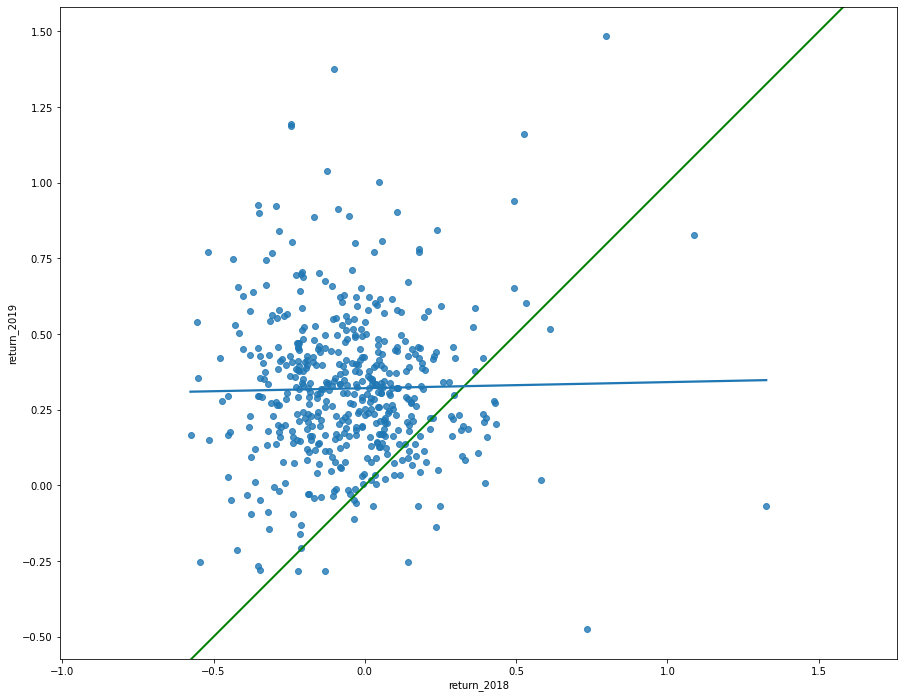

In [50]:
# Create a new figure, fig
fig = plt.figure(figsize=(15, 12))

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

> The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

### Modeling consecutive returns


In [51]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', sp500_yearly_returns).fit()

# Print the parameters
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [52]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
mdl_returns.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

> Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

## Transforming variables


In [53]:
perch = fish[fish['species']=='Perch']
perch.head()

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7


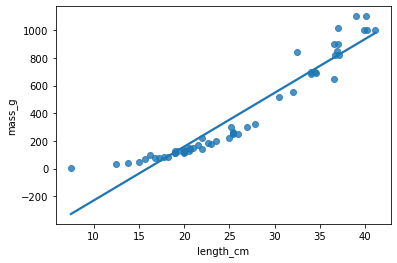

In [54]:
sns.regplot(x='length_cm', y='mass_g', data=perch, ci=None)
plt.show()

> To understand why the bream had a strong linear relationship between mass and length, but the perch didn't, you need to understand the data.

> As bream get bigger, they mostly get longer not wider. By contrast, the perch spiece has a round body. So that, as it grows, it gets fatter and taller as well as longer.


> Since the perches are growing in three directions at once, maybe the length cubed will give a better fit.

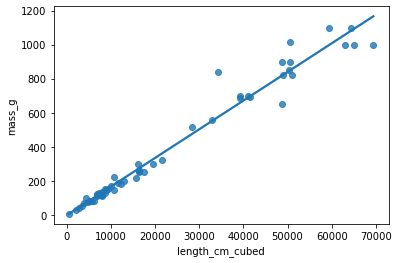

In [55]:
perch = perch.copy()
perch['length_cm_cubed'] = perch['length_cm'] ** 3

sns.regplot(x='length_cm_cubed', y='mass_g', data=perch, ci=None)
plt.show()

In [56]:
mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
mdl_perch.params

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

In [57]:
explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10,41,5)**3, 'length_cm': np.arange(10, 41, 5)})
explanatory_data

,length_cm_cubed,length_cm
0,1000,10
1,3375,15
2,8000,20
3,15625,25
4,27000,30
5,42875,35
6,64000,40


In [58]:
prediction_data = explanatory_data.assign(mass_g=mdl_perch.predict(explanatory_data))
prediction_data

,length_cm_cubed,length_cm,mass_g
0,1000,10,16.678135
1,3375,15,56.567717
2,8000,20,134.247429
3,15625,25,262.313982
4,27000,30,453.364084
5,42875,35,719.994447
6,64000,40,1074.801781


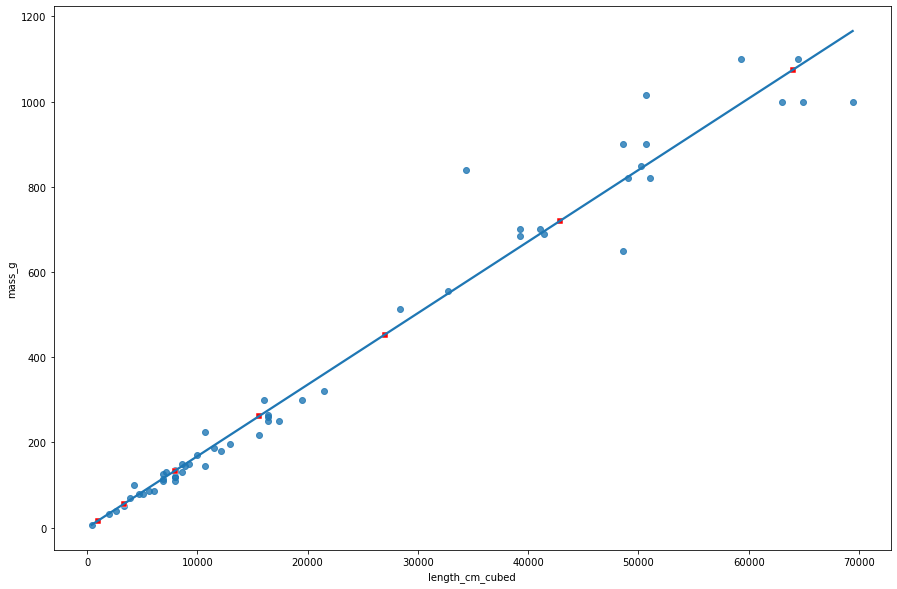

In [59]:
fig = plt.figure(figsize=(15, 10))

sns.regplot(x='length_cm_cubed', y='mass_g', data=perch, ci=None)

sns.scatterplot(x='length_cm_cubed', y='mass_g', data=prediction_data, color='red', marker='s')
plt.show()

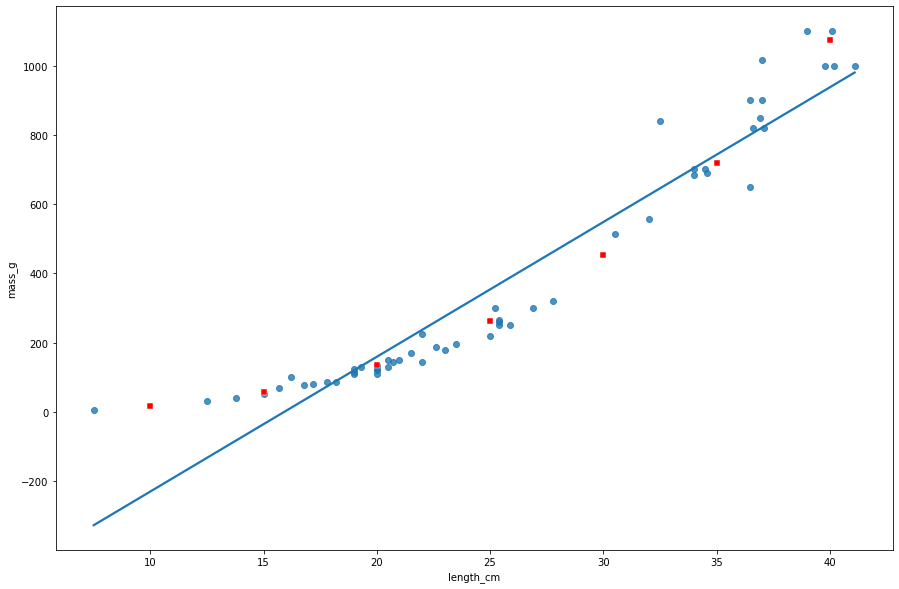

In [60]:
fig = plt.figure(figsize=(15, 10))

sns.regplot(x='length_cm', y='mass_g', data=perch, ci=None)

sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data, color='red', marker='s')
plt.show()

#### Facebook Advertising Dataset

In [61]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


<AxesSubplot:xlabel='spent_usd', ylabel='n_impressions'>

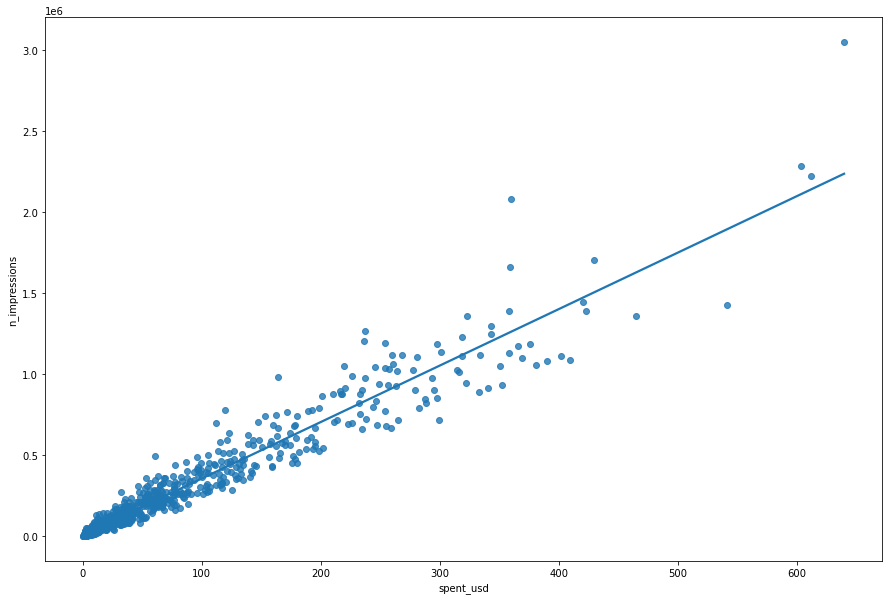

In [62]:
plt.figure(figsize=(15, 10))
sns.regplot(x='spent_usd', y='n_impressions', data=ad_conversion, ci=None)

<AxesSubplot:xlabel='sqrt_spent_usd', ylabel='sqrt_n_impressions'>

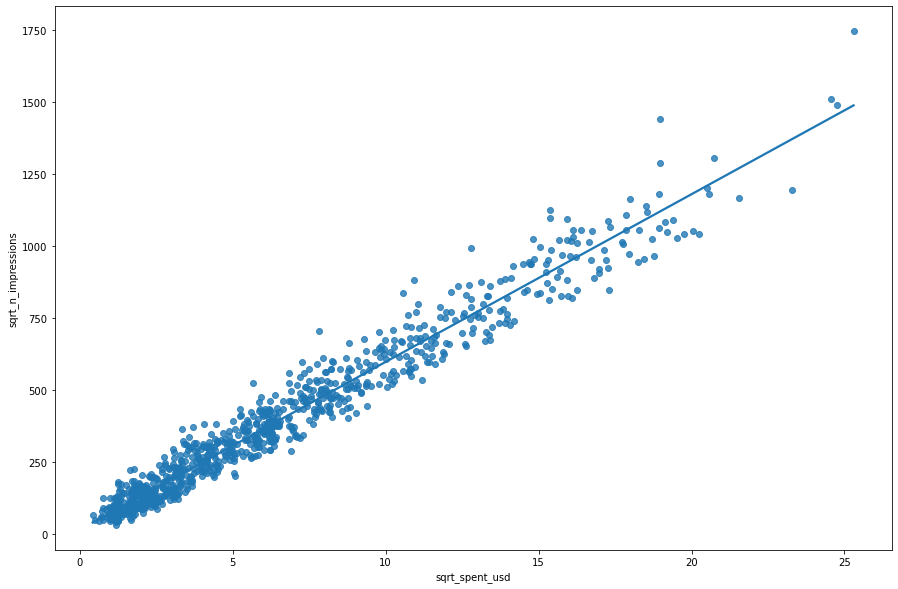

In [63]:
ad_conversion['sqrt_spent_usd'] = np.sqrt(ad_conversion['spent_usd'])
ad_conversion['sqrt_n_impressions'] = np.sqrt(ad_conversion['n_impressions'])
plt.figure(figsize=(15, 10))
sns.regplot(x='sqrt_spent_usd', y='sqrt_n_impressions', data=ad_conversion, ci=None)

> By transforming both variables with square roots, the data are more spread out throughout the plot, and the points follow the line fairly closely.

> Square roots are a common transformation when your data has a right-skewed distribution.

In [64]:
mdl_ad = ols('sqrt_n_impressions ~ sqrt_spent_usd', data=ad_conversion).fit()
mdl_ad.params

Intercept         15.319713
sqrt_spent_usd    58.241687
dtype: float64

In [65]:
explanatory_data = pd.DataFrame({"sqrt_spent_usd": np.sqrt(np.arange(0,601,100)), "spent_usd": np.arange(0,601,100)})
explanatory_data

,sqrt_spent_usd,spent_usd
0,0.000000,0
1,10.000000,100
2,14.142136,200
3,17.320508,300
4,20.000000,400
5,22.360680,500
6,24.494897,600


In [66]:
prediction_data = explanatory_data.assign(sqrt_n_impressions=mdl_ad.predict(explanatory_data), n_impressions=mdl_ad.predict(explanatory_data) ** 2)
prediction_data

,sqrt_spent_usd,spent_usd,sqrt_n_impressions,n_impressions
0,0.000000,0,15.319713,2.346936e+02
1,10.000000,100,597.736582,3.572890e+05
2,14.142136,200,838.981547,7.038900e+05
3,17.320508,300,1024.095320,1.048771e+06
4,20.000000,400,1180.153450,1.392762e+06
5,22.360680,500,1317.643422,1.736184e+06
6,24.494897,600,1441.943858,2.079202e+06


### Transforming the explanatory variable


In [67]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


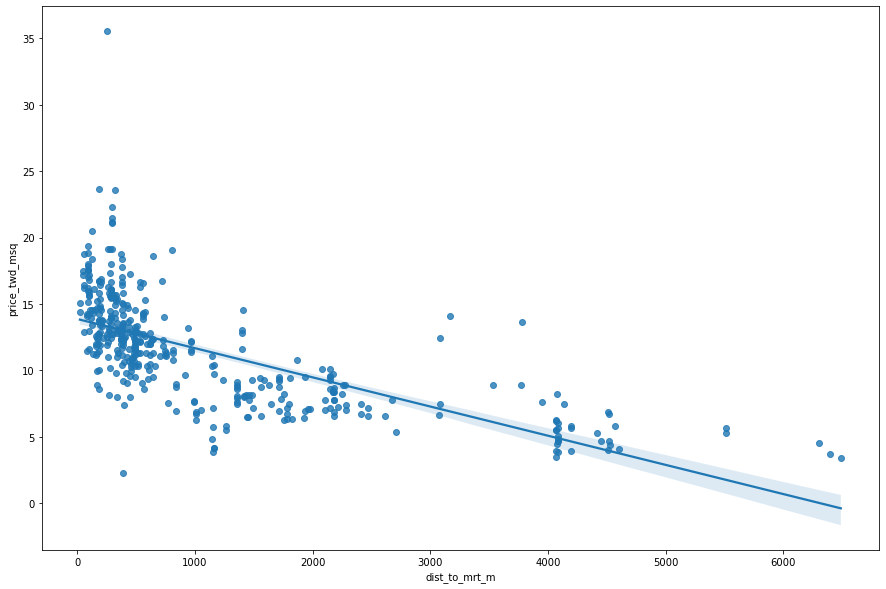

In [68]:
plt.figure(figsize=(15, 10))

# Plot using the transformed variable
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

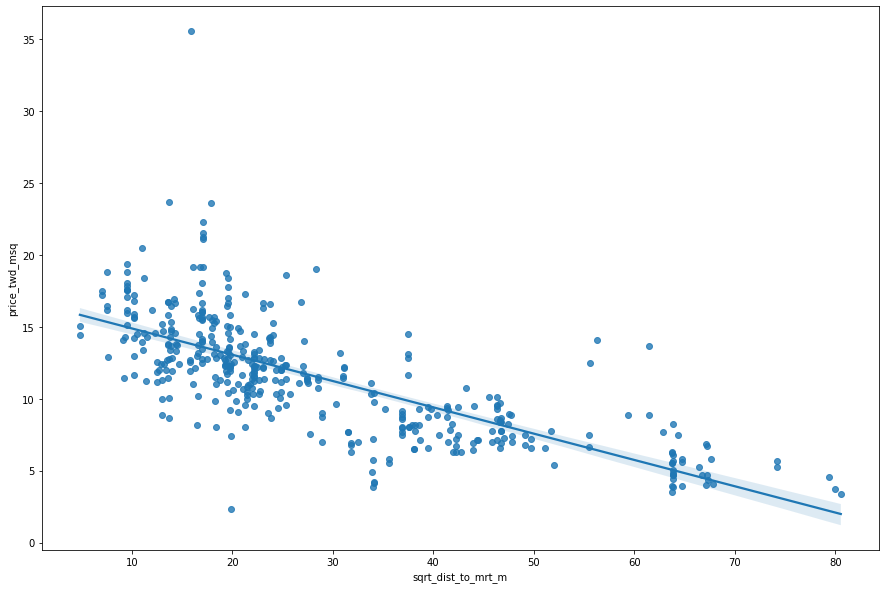

In [69]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure(figsize=(15, 10))

# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

In [70]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data = taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [71]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
explanatory_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m
0,0.0,0
1,10.0,100
2,20.0,400
3,30.0,900
4,40.0,1600
5,50.0,2500
6,60.0,3600
7,70.0,4900
8,80.0,6400


In [72]:
# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
prediction_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.0,0,16.709799
1,10.0,100,14.881370
2,20.0,400,13.052942
3,30.0,900,11.224513
4,40.0,1600,9.396085
5,50.0,2500,7.567656
6,60.0,3600,5.739227
7,70.0,4900,3.910799
8,80.0,6400,2.082370


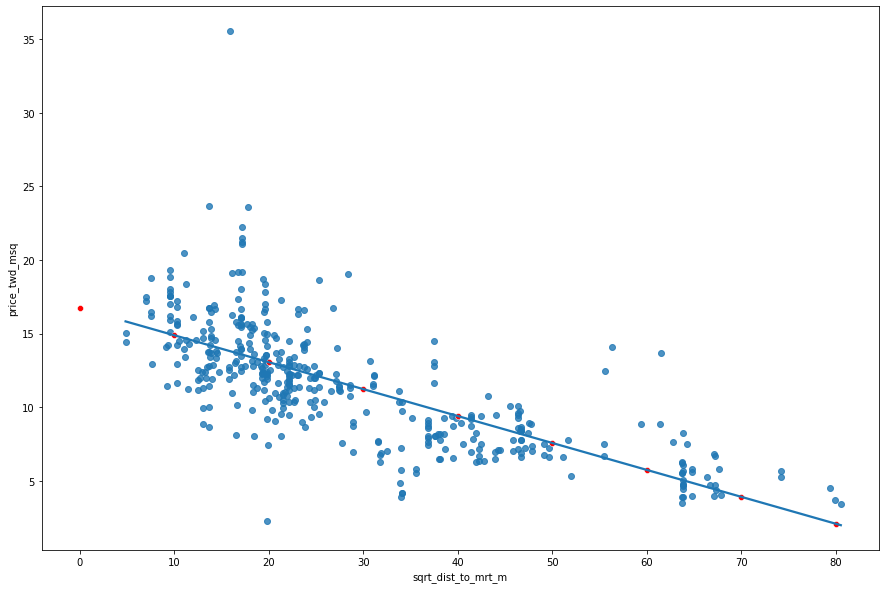

In [73]:
fig = plt.figure(figsize=(15,10))
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color='red')
plt.show()

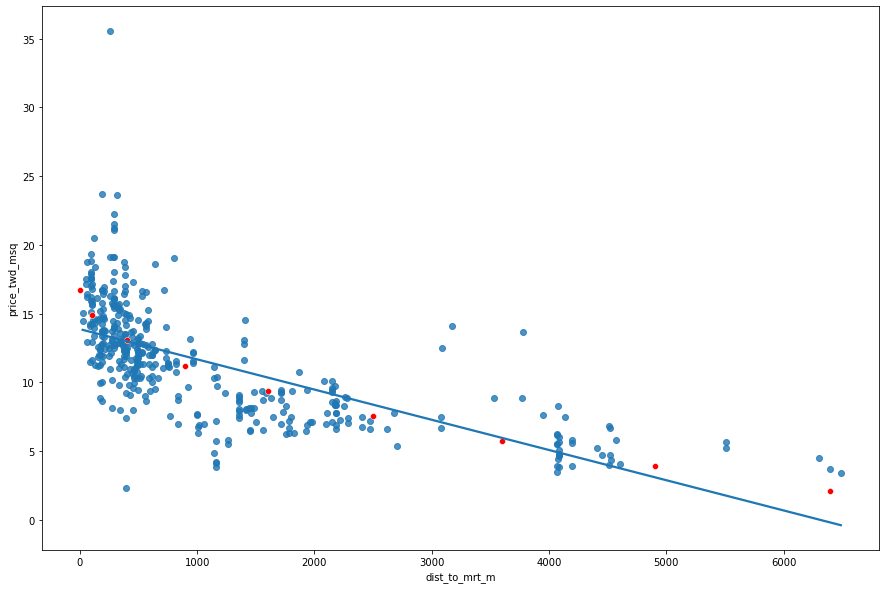

In [74]:
fig = plt.figure(figsize=(15,10))
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color='red')
plt.show()

> By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

### Transforming the response variable too


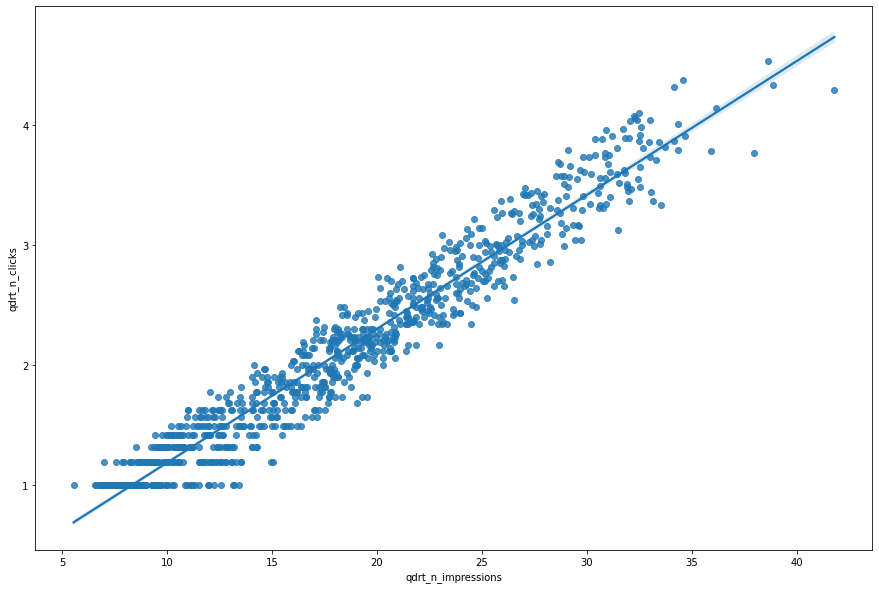

In [75]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure(figsize=(15,10))
# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data = ad_conversion)
plt.show()

In [76]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', ad_conversion).fit()
mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In [77]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})
explanatory_data

,qdrt_n_impressions,n_impressions
0,0.000000,0.0
1,26.591479,500000.0
2,31.622777,1000000.0
3,34.996355,1500000.0
4,37.606031,2000000.0
5,39.763536,2500000.0
6,41.617915,3000000.0


In [78]:
# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
prediction_data

,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


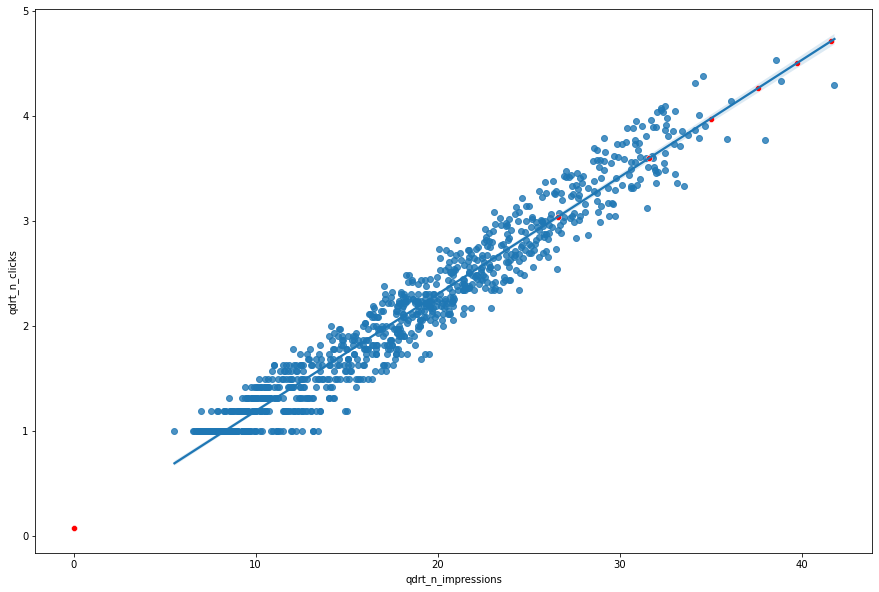

In [79]:
plt.figure(figsize=(15,10))
# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data = ad_conversion)
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color='red')
plt.show()

### Back transformation


In [80]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
prediction_data

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0.0,0.071748,0.000026
1,26.591479,500000.0,3.037576,85.135121
2,31.622777,1000000.0,3.598732,167.725102
3,34.996355,1500000.0,3.974998,249.659131
4,37.606031,2000000.0,4.266063,331.214159
5,39.763536,2500000.0,4.506696,412.508546
6,41.617915,3000000.0,4.713520,493.607180


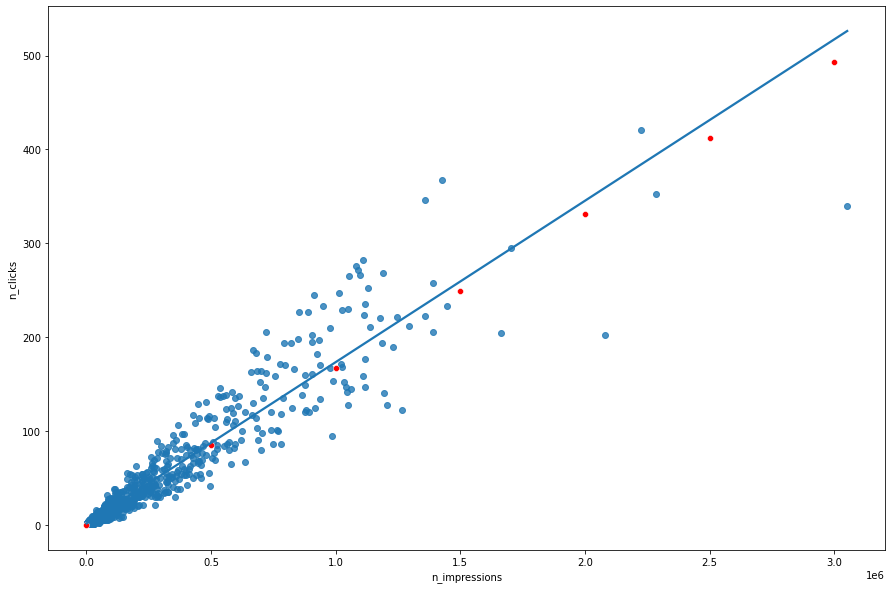

In [81]:
# Plot the transformed variables
plt.figure(figsize=(15,10))
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='n_impressions', y="n_clicks", data=prediction_data, color='red')
plt.show()

# 3. Assessing model fit

## Quantifying model fit

#### Coefficient of determination

"r-squared": For simple linear regression.
"R-squared": More than one explanatory variable.

> 1 Score: Perfect fit!

> 0 Score: Worst possible fit!

A score of 0.5 in a psychological experiment may be exceptionally high beacuse humans are inherently hard to predict. In other cases, a score of 0.9 may be considered a poor fit.


In [82]:
mdl_bream = ols("mass_g ~ length_cm", data=bream).fit()
mdl_bream.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.22e-16
Time:                        15:03:58   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> We also can get "R-squared" with the attribute .rsquared.

In [83]:
mdl_bream.rsquared

0.8780627095147174

> It is just the correlation squared

In [84]:
cieff_determination = bream['length_cm'].corr(bream['mass_g']) ** 2
cieff_determination

0.8780627095147171

#### Residual standard srror (RSE)

> MSE (Mean squared error) = RSE ^ 2

In [85]:
mse = mdl_bream.mse_resid
mse

5498.555084973521

In [86]:
rse = np.sqrt(mse)
rse

74.15224261594197

##### Calculating the RSE manually

In [87]:
residuals_sq = mdl_bream.resid ** 2

resid_sum_of_sq = sum(residuals_sq)
resid_sum_of_sq

181452.31780412616

In [88]:
deg_freedom = len(bream.index) - 2
deg_freedom

33

In [89]:
rse = np.sqrt(resid_sum_of_sq / deg_freedom)
rse

74.15224261594197

##### RSE: The difference between predicted bream masses and observed bream masses is typically about 74g.

#### Root Mean Square Error (RMSE)

In [90]:
residuals_sq = mdl_bream.resid ** 2

resid_sum_of_sq = sum(residuals_sq)

n_obs = len(bream.index) 

rmse = np.sqrt(resid_sum_of_sq / n_obs)
rmse

72.00244396727619

### Coefficient of determination


In [91]:
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions', ad_conversion).fit()
mdl_click_vs_impression_orig.params

Intercept        1.682896
n_impressions    0.000172
dtype: float64

In [92]:
mdl_click_vs_impression_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions', ad_conversion).fit()
mdl_click_vs_impression_trans.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In [93]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Fri, 12 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:03:58   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [94]:
# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Fri, 12 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:03:58   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [95]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


> Original: The number of impressions explains 89% of the variability in the number of clicks.

> Transformed: The number of impressions explains 94% of the variability in the number of clicks.

##### The transformed model, mdl_click_vs_impression_trans, gives a better fit.

> The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.

### Residual standard error


In [96]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


> Original: The typical difference between observed number of clicks and predicted number of clicks is 20.

> Transformed: The typical difference between observed number of clicks and predicted number of clicks is 0.20.

##### Which model does the RSE suggest gives more accurate predictions?

> The transformed model, mdl_click_vs_impression_trans.

> RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

## Visualizing model fit

### Residuals properties of a good fit

##### 1. Residuals are normally distributed.

##### 2. The mean of the residuals is zero.

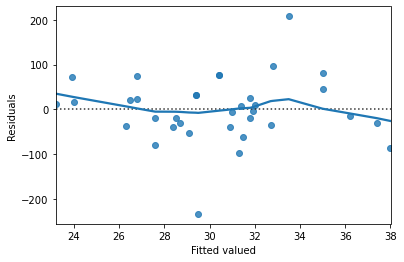

In [97]:
sns.residplot(x='length_cm', y='mass_g', data=bream, lowess=True)
plt.xlabel('Fitted valued')
plt.ylabel('Residuals')
plt.show()

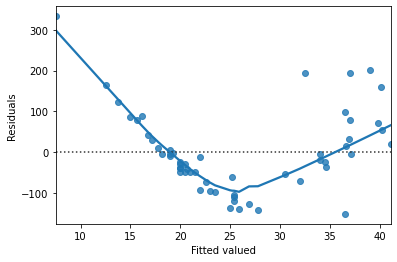

In [98]:
sns.residplot(x='length_cm', y='mass_g', data=perch, lowess=True)
plt.xlabel('Fitted valued')
plt.ylabel('Residuals')
plt.show()

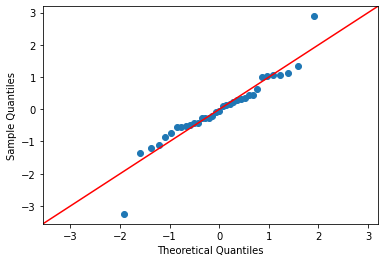

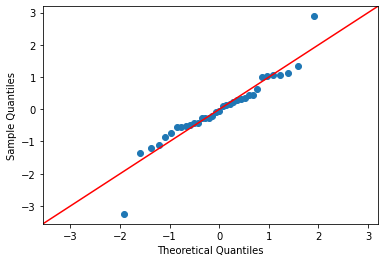

In [99]:
from statsmodels.api import qqplot

qqplot(data=mdl_bream.resid, fit=True, line='45')

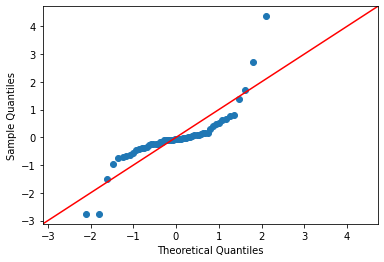

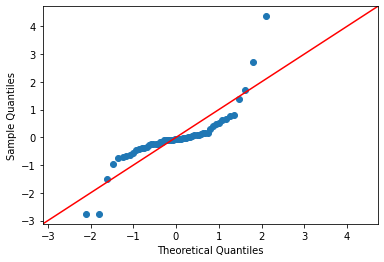

In [100]:
qqplot(data=mdl_perch.resid, fit=True, line='45')

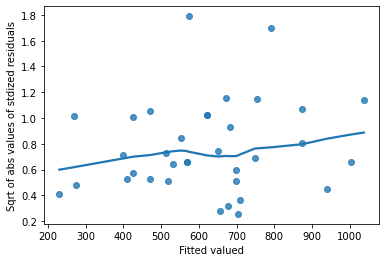

In [101]:
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))

sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True)
plt.xlabel('Fitted valued')
plt.ylabel('Sqrt of abs values of stdized residuals')
plt.show()

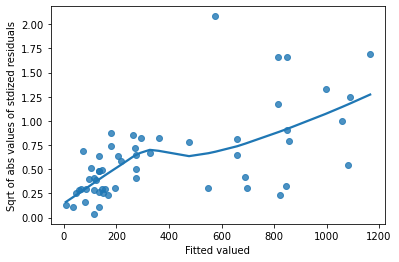

In [102]:
model_norm_residuals_perch = mdl_perch.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_perch = np.sqrt(np.abs(model_norm_residuals_perch))

sns.regplot(x=mdl_perch.fittedvalues, y=model_norm_residuals_abs_sqrt_perch, ci=None, lowess=True)
plt.xlabel('Fitted valued')
plt.ylabel('Sqrt of abs values of stdized residuals')
plt.show()

### Drawing diagnostic plots

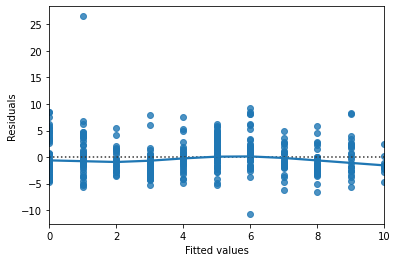

In [103]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

> The residuals track the y = 0 line more closely in the original model compared to the transformed model, indicating that the original model is a better fit for the data.

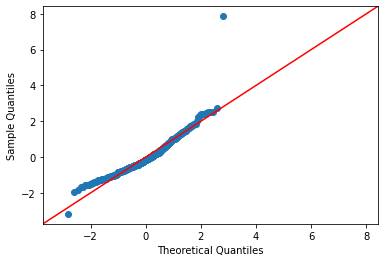

In [104]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

> The residuals track the "normality" line more closely in the original model compared to the transformed model, indicating that the original model is a better fit for the data.

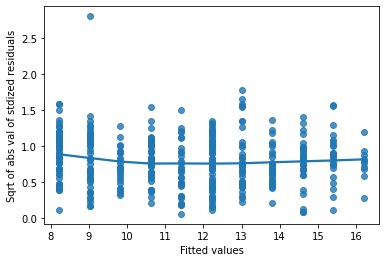

In [105]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

> The size of the standardized residuals is more consistent in the original model compared to the transformed model, indicating that the original model is a better fit for the data.

## Outliers, leverage, and influence


In [106]:
roach = fish[fish['species'] == 'Roach']
roach.head()

,species,mass_g,length_cm
35,Roach,40.0,12.9
36,Roach,69.0,16.5
37,Roach,78.0,17.5
38,Roach,87.0,18.2
39,Roach,120.0,18.6


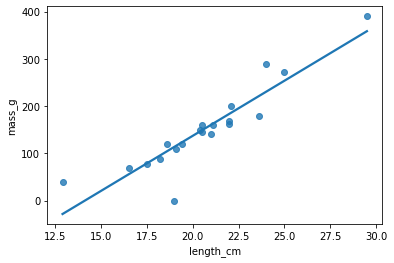

In [107]:
sns.regplot(x='length_cm', y='mass_g', data=roach, ci=None)
plt.show()

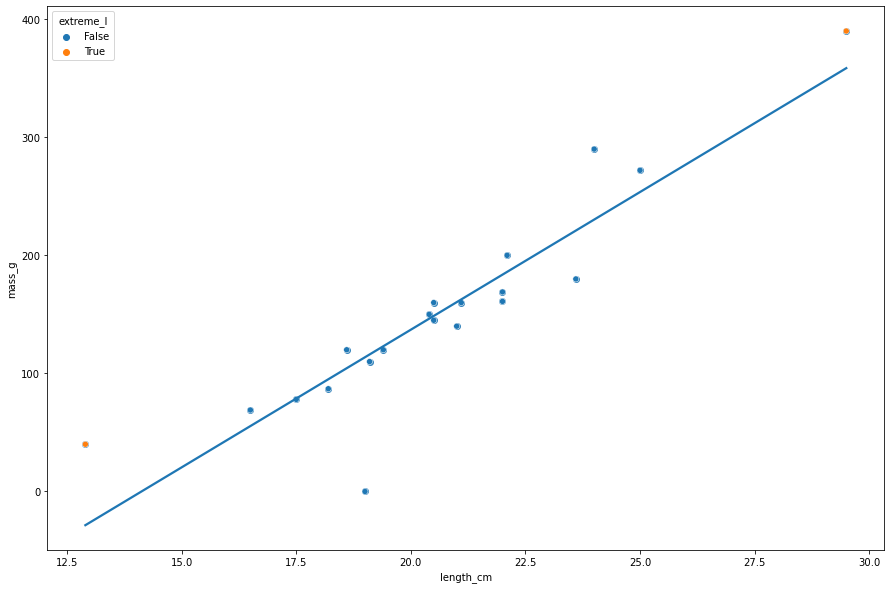

In [108]:
roach = roach.copy()
roach['extreme_l'] = ((roach['length_cm'] < 15) | (roach['length_cm'] > 26 ))

fig = plt.figure(figsize=(15,10))
sns.regplot(x='length_cm', y='mass_g', data=roach, ci=None)

sns.scatterplot(x='length_cm', y='mass_g', data=roach, hue='extreme_l')
plt.show()

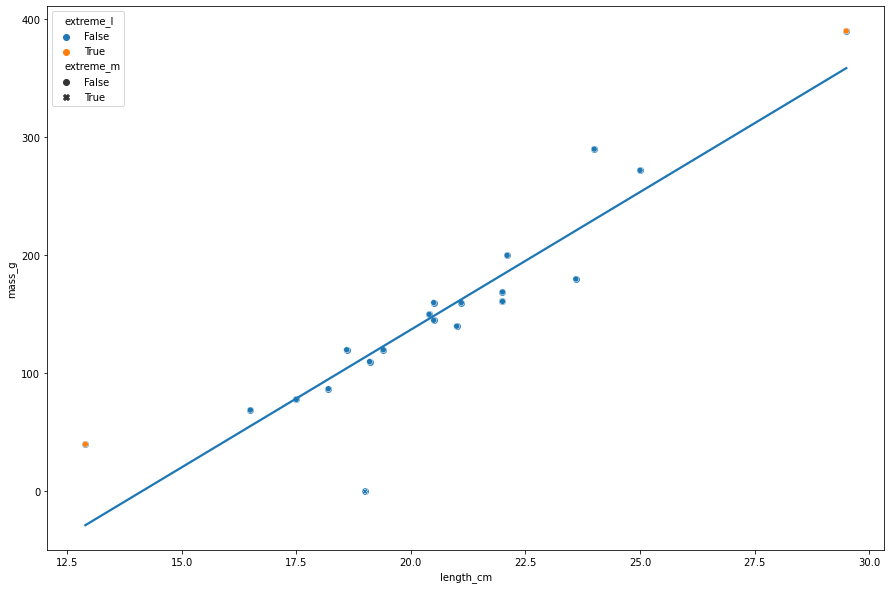

In [109]:
roach['extreme_m'] = roach['mass_g'] < 1

fig = plt.figure(figsize=(15,10))
sns.regplot(x='length_cm', y='mass_g', data=roach, ci=None)

sns.scatterplot(x='length_cm', y='mass_g', data=roach, hue='extreme_l', style='extreme_m')
plt.show()

##### Leverage is a measure of how extreme the explanatory variable values are.
##### Influence measures how much the model would change if you left the observation out of the dataset when modeling.

In [110]:
mdl_roach = ols('mass_g ~ length_cm', data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()
summary_roach

,dfb_Intercept,dfb_length_cm,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
35,1.605912,-1.519147,1.074015,2.167658,0.313729,1.465616,2.450579,1.656908
36,0.122222,-0.109314,0.010429,0.381169,0.125538,0.144422,0.371934,0.140923
37,-0.004828,0.004163,0.000020,-0.019557,0.093487,-0.006281,-0.019007,-0.006104
38,-0.043464,0.035942,0.001980,-0.218961,0.076283,-0.062923,-0.213076,-0.061232
39,0.072949,-0.058230,0.006610,0.424368,0.068387,0.114977,0.414490,0.112301
40,-0.643292,0.488301,0.311852,-3.074529,0.061897,-0.789749,-4.336001,-1.113781
41,-0.022393,0.016726,0.000853,-0.162725,0.060495,-0.041292,-0.158257,-0.040158
42,-0.009572,0.006724,0.000199,-0.081383,0.056815,-0.019974,-0.079105,-0.019415
43,0.005115,-0.001595,0.000257,0.098456,0.050264,0.022650,0.095708,0.022018
44,-0.004478,0.000945,0.000256,-0.098595,0.050092,-0.022641,-0.095843,-0.022009


In [111]:
roach['leverage'] = summary_roach['hat_diag']
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage
35,Roach,40.0,12.9,True,False,0.313729
36,Roach,69.0,16.5,False,False,0.125538
37,Roach,78.0,17.5,False,False,0.093487
38,Roach,87.0,18.2,False,False,0.076283
39,Roach,120.0,18.6,False,False,0.068387


In [112]:
roach['cooks_dist'] = summary_roach['cooks_d']
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
36,Roach,69.0,16.5,False,False,0.125538,0.010429
37,Roach,78.0,17.5,False,False,0.093487,0.000020
38,Roach,87.0,18.2,False,False,0.076283,0.001980
39,Roach,120.0,18.6,False,False,0.068387,0.006610


In [113]:
roach.sort_values("cooks_dist", ascending = False)

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
54,Roach,390.0,29.5,True,False,0.394740,0.365782
40,Roach,0.0,19.0,False,True,0.061897,0.311852
52,Roach,290.0,24.0,False,False,0.099488,0.150064
51,Roach,180.0,23.6,False,False,0.088391,0.061209
53,Roach,272.0,25.0,False,False,0.133386,0.020615
49,Roach,161.0,22.0,False,False,0.058072,0.011516
36,Roach,69.0,16.5,False,False,0.125538,0.010429
46,Roach,140.0,21.0,False,False,0.050554,0.007950
39,Roach,120.0,18.6,False,False,0.068387,0.006610


##### Removing the most influential roach

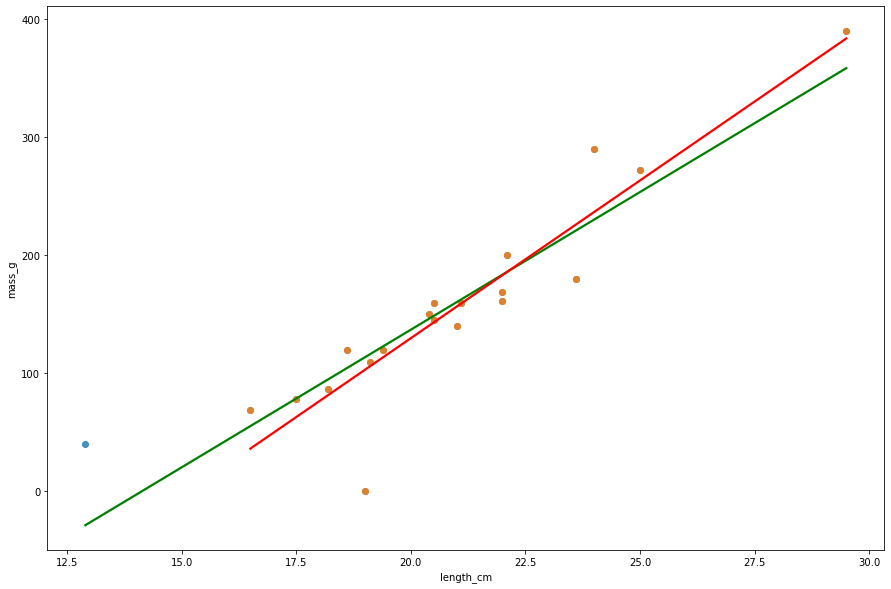

In [114]:
roach_not_short = roach[roach['length_cm'] != 12.9]

fig = plt.figure(figsize=(15,10))
sns.regplot(x='length_cm', y='mass_g', data=roach, ci=None, line_kws={'color':'green'})

sns.regplot(x='length_cm', y='mass_g', data=roach_not_short, ci=None, line_kws={'color':'red'})
plt.show()

##### Leverage
Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

> Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

##### Influence

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

> Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

### Extracting leverage and influence


In [115]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate.sort_values("leverage", ascending = False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage
347,6488.021,1,15 to 30,3.388805,80.548253,0.026665
116,6396.283,1,30 to 45,3.691377,79.976765,0.026135
249,6306.153,1,15 to 30,4.538578,79.411290,0.025617
255,5512.038,1,30 to 45,5.264750,74.243101,0.021142
8,5512.038,1,30 to 45,5.688351,74.243101,0.021142


In [116]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values("cooks_dist", ascending = False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003849,0.115549
148,3780.5900,0,15 to 30,13.645991,61.486503,0.012147,0.052440
228,3171.3290,0,0 to 15,14.099849,56.314554,0.009332,0.035384
220,186.5101,9,30 to 45,23.691377,13.656870,0.004401,0.025123
113,393.2606,6,0 to 15,2.299546,19.830799,0.003095,0.022813


> Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.

# 4. Simple Logistic Regression Modeling
## Why you need logistic regression


In [117]:
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


#### Churn vs Recency: A linear model

In [118]:
mdl_churn_vs_recency_lm = ols('has_churned ~ time_since_last_purchase', data=churn).fit()
mdl_churn_vs_recency_lm.params

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64

In [119]:
intercept, slope = mdl_churn_vs_recency_lm.params
intercept, slope

(0.49078015222740073, 0.06378347043715502)

##### Visualizing the linear model

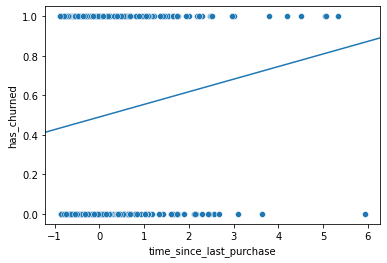

In [120]:
sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=churn)

plt.axline(xy1=(0, intercept), slope=slope)
plt.show()

##### Zooming out

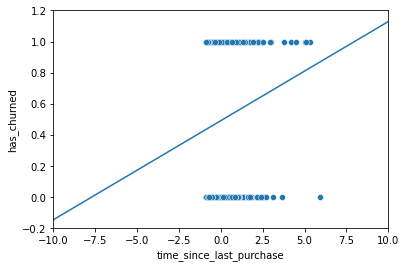

In [121]:
sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=churn)

plt.axline(xy1=(0, intercept), slope=slope)
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)
plt.show()

> In the bottom left on the plot, the model predicts negative probabilities. In the top right, the model predicts probabilities grater than one.

#### The solution is to use a logistic regression model

> Another type of generalized linear model.

> Used when the response variable is logical.

> The responses follow logictic (S=Shaped) curve.

In [122]:
from statsmodels.formula.api import logit

mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
mdl_churn_vs_recency_logit.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

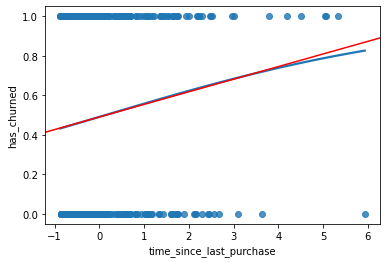

In [123]:
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
plt.axline(xy1=(0, intercept), slope=slope, color='red')
plt.show()

### Exploring the explanatory variables


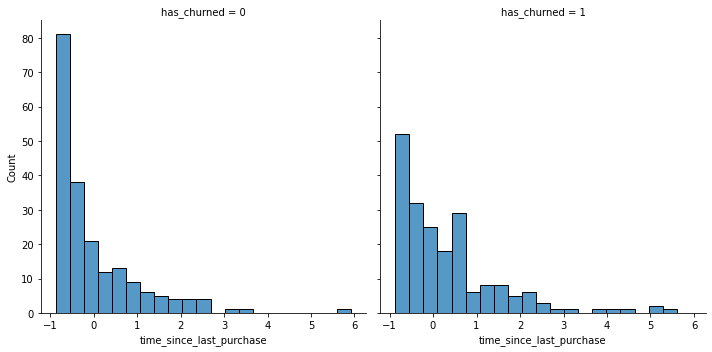

In [124]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x='time_since_last_purchase', col = 'has_churned', data=churn)

plt.show()

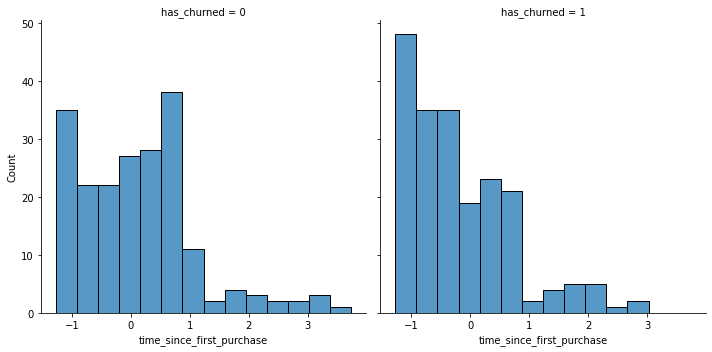

In [125]:
# Redraw the plot with time_since_first_purchase
sns.displot(x='time_since_first_purchase', col = 'has_churned', data=churn)

plt.show()

> In the time_since_last_purchase plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

### Visualizing linear and logistic models


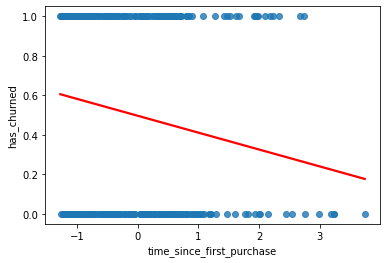

In [126]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None, 
            line_kws={"color": "red"})

plt.show()

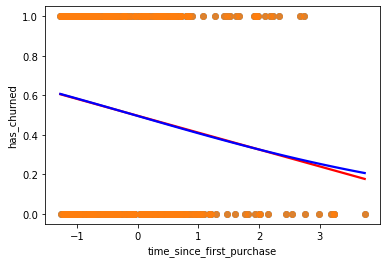

In [127]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None, logistic=True, line_kws={"color": "blue"})

plt.show()

> The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

### Logistic regression with logit()


In [128]:
# Import logit
from statsmodels.formula.api import logit


# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


> The code to run a logistic regression is a simple change from the code to run a linear regression. Now we can make some predictions with the model.

## Predictions and odds ratios


In [129]:
mdl_recency = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
mdl_recency.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

In [130]:
explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-1,6.25,0.25)})
explanatory_data

,time_since_last_purchase
0,-1.00
1,-0.75
2,-0.50
3,-0.25
4,0.00
5,0.25
6,0.50
7,0.75
8,1.00
9,1.25


In [131]:
prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
prediction_data

,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246
5,0.25,0.508070
6,0.50,0.524876
7,0.75,0.541626
8,1.00,0.558283
9,1.25,0.574809


##### Adding point predictions

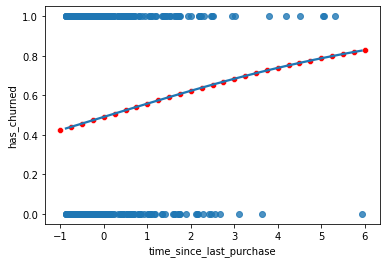

In [132]:
sns.regplot(x="time_since_last_purchase", y='has_churned', data=churn, ci=None, logistic=True)
sns.scatterplot(x="time_since_last_purchase", y='has_churned', data=prediction_data, color='red')
plt.show()

In [133]:
prediction_data['most_likely_outcome'] = np.round(prediction_data['has_churned'])
prediction_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome
0,-1.00,0.424523,0.0
1,-0.75,0.441043,0.0
2,-0.50,0.457695,0.0
3,-0.25,0.474441,0.0
4,0.00,0.491246,0.0


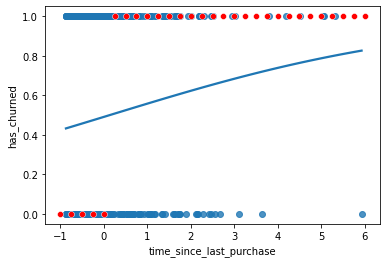

In [134]:
sns.regplot(x="time_since_last_purchase", y='has_churned', data=churn, ci=None, logistic=True)
sns.scatterplot(x="time_since_last_purchase", y='most_likely_outcome', data=prediction_data, color='red')
plt.show()

##### Odd ratios

Odds ratio is the probability of something happening divided by the probability that it doesn't.

In [135]:
prediction_data['odds_ratio'] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])
prediction_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.00,0.424523,0.0,0.737688
1,-0.75,0.441043,0.0,0.789046
2,-0.50,0.457695,0.0,0.843980
3,-0.25,0.474441,0.0,0.902738
4,0.00,0.491246,0.0,0.965587


##### Visualizing odds ratio

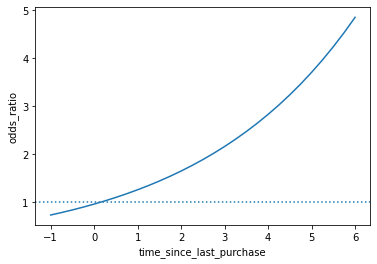

In [136]:
sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data)
plt.axhline(y=1, linestyle="dotted")
plt.show()

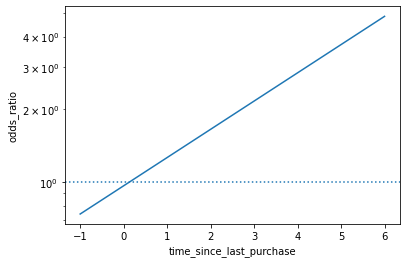

In [137]:
sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data)
plt.axhline(y=1, linestyle="dotted")
plt.yscale("log")
plt.show()

In [138]:
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])
prediction_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.00,0.424523,0.0,0.737688,-0.304234
1,-0.75,0.441043,0.0,0.789046,-0.236931
2,-0.50,0.457695,0.0,0.843980,-0.169627
3,-0.25,0.474441,0.0,0.902738,-0.102323
4,0.00,0.491246,0.0,0.965587,-0.035019


### Probabilities

In [139]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
mdl_churn_vs_relationship.params

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64

In [140]:
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1.5,4,0.25)})
explanatory_data

,time_since_first_purchase
0,-1.50
1,-1.25
2,-1.00
3,-0.75
4,-0.50
5,-0.25
6,0.00
7,0.25
8,0.50
9,0.75


In [141]:
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
prediction_data.head()

,time_since_first_purchase,has_churned
0,-1.50,0.626448
1,-1.25,0.605470
2,-1.00,0.584096
3,-0.75,0.562401
4,-0.50,0.540465


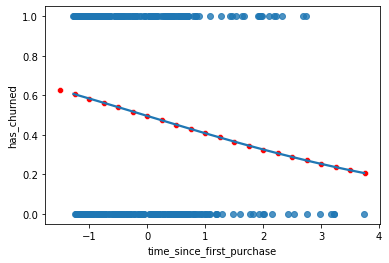

In [142]:
fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.scatterplot(x='time_since_first_purchase', y='has_churned', data=prediction_data, color='red')

# Overlay with prediction_data, colored red
sns.regplot(x="time_since_first_purchase", y='has_churned', data=churn, ci=None, logistic=True)

plt.show()

### Most likely outcome


In [143]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome
0,-1.50,0.626448,1.0
1,-1.25,0.605470,1.0
2,-1.00,0.584096,1.0
3,-0.75,0.562401,1.0
4,-0.50,0.540465,1.0


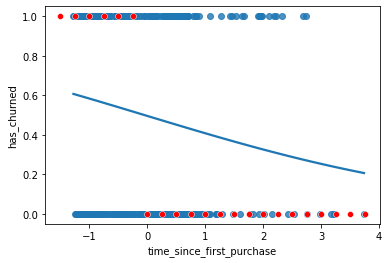

In [144]:
# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase", y='most_likely_outcome', data=prediction_data, color='red')

plt.show()

### Odds ratio


In [145]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])

# Print the head
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.50,0.626448,1.0,1.677003
1,-1.25,0.605470,1.0,1.534661
2,-1.00,0.584096,1.0,1.404400
3,-0.75,0.562401,1.0,1.285197
4,-0.50,0.540465,1.0,1.176111


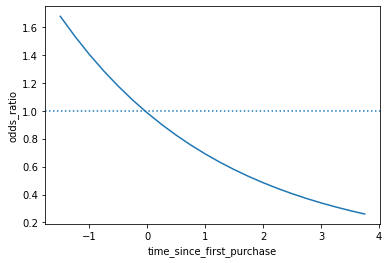

In [146]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase", y="odds_ratio", data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

### Log odds ratio


In [147]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

# Print the head
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.50,0.626448,1.0,1.677003,0.517008
1,-1.25,0.605470,1.0,1.534661,0.428309
2,-1.00,0.584096,1.0,1.404400,0.339610
3,-0.75,0.562401,1.0,1.285197,0.250912
4,-0.50,0.540465,1.0,1.176111,0.162213


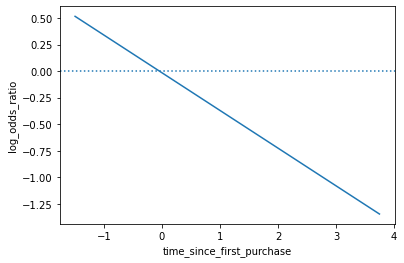

In [148]:
fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit
### The four outcomes
###### The customer didn't churn and we predicted they wouldn't, or viceversa. The model did well.
###### Predicting the customer churned when they didn't is called a false positive.
###### Predicting the customer didn't churn when they did is called a false negative.

In [152]:
actual_response = churn['has_churned']
actual_response.head()

0    0
1    0
2    0
3    0
4    0
Name: has_churned, dtype: int64

In [154]:
predicted_response = np.round(mdl_recency.predict())
predicted_response[:11]

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [156]:
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})
outcomes.value_counts(sort=False)

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
dtype: int64

> There were 59 false positives and 111 false negatives.

In [157]:
conf_matrix = mdl_recency.pred_table()
conf_matrix

array([[141.,  59.],
       [111.,  89.]])

> True negatives, False positives

> False negatives, True positives

(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

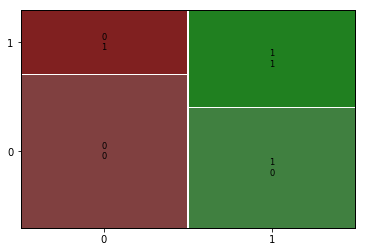

In [158]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

### Accuracy 

Accuracy is the proportion of correct predictions.



In [159]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [160]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
accuracy

0.575

### Sensitivity 

Sensitivity is the proportion of true positives.




In [161]:
sensitivity = TP / (FN + TP)
sensitivity

0.445

### Specificity

Specificity is the proportion of true negatives.


In [162]:
specificity = TN / (TN + FP)
specificity

0.705

### Calculating the confusion matrix


In [163]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})

# Print the outcomes
outcomes.value_counts(sort = False)

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64

> The name 'confusion matrix' sounds scary, but it's just a table of counts.

### Drawing a mosaic plot of the confusion matrix


[[112.  88.]
 [ 76. 124.]]


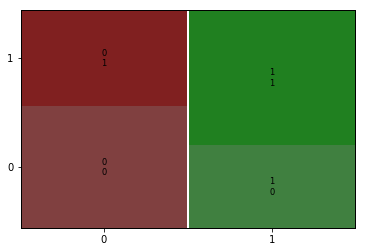

In [164]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic


# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

##### Accuracy: The proportion of customers where the model correctly predicted whether or not they churned.

##### Sensitivity: The proportion of customers who churned where the model correctly predicted that they churned.

##### Sepecificity: The proportion of customers who didn't churn where the model correctly predicted that they didn't churn.

### Measuring logistic model performance


In [165]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
